<a href="https://colab.research.google.com/github/12vikas12/Apex-Planet-Internship/blob/main/task4_vtiu23125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object

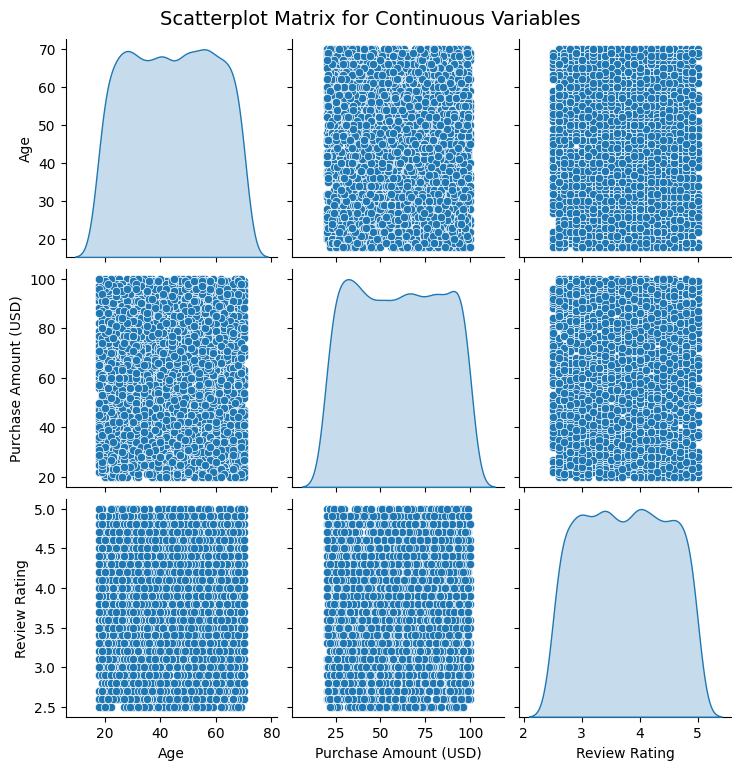


Parallel Coordinates Plot:



Line Graph:


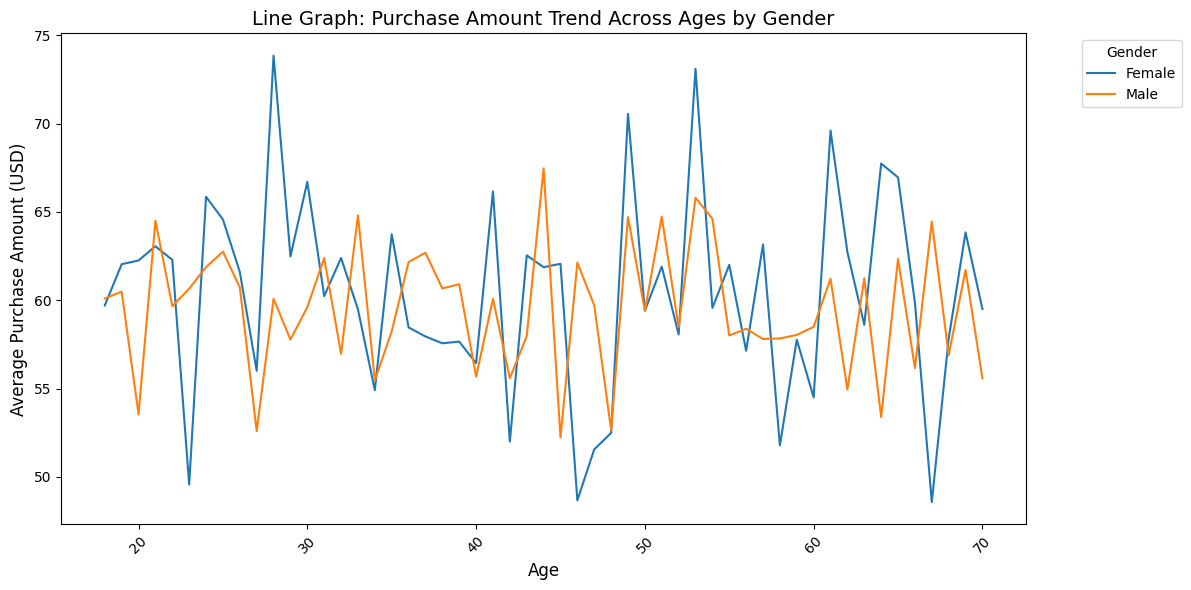


Stacked Bar Chart:


/tmp/ipython-input-2236022764.py:67: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



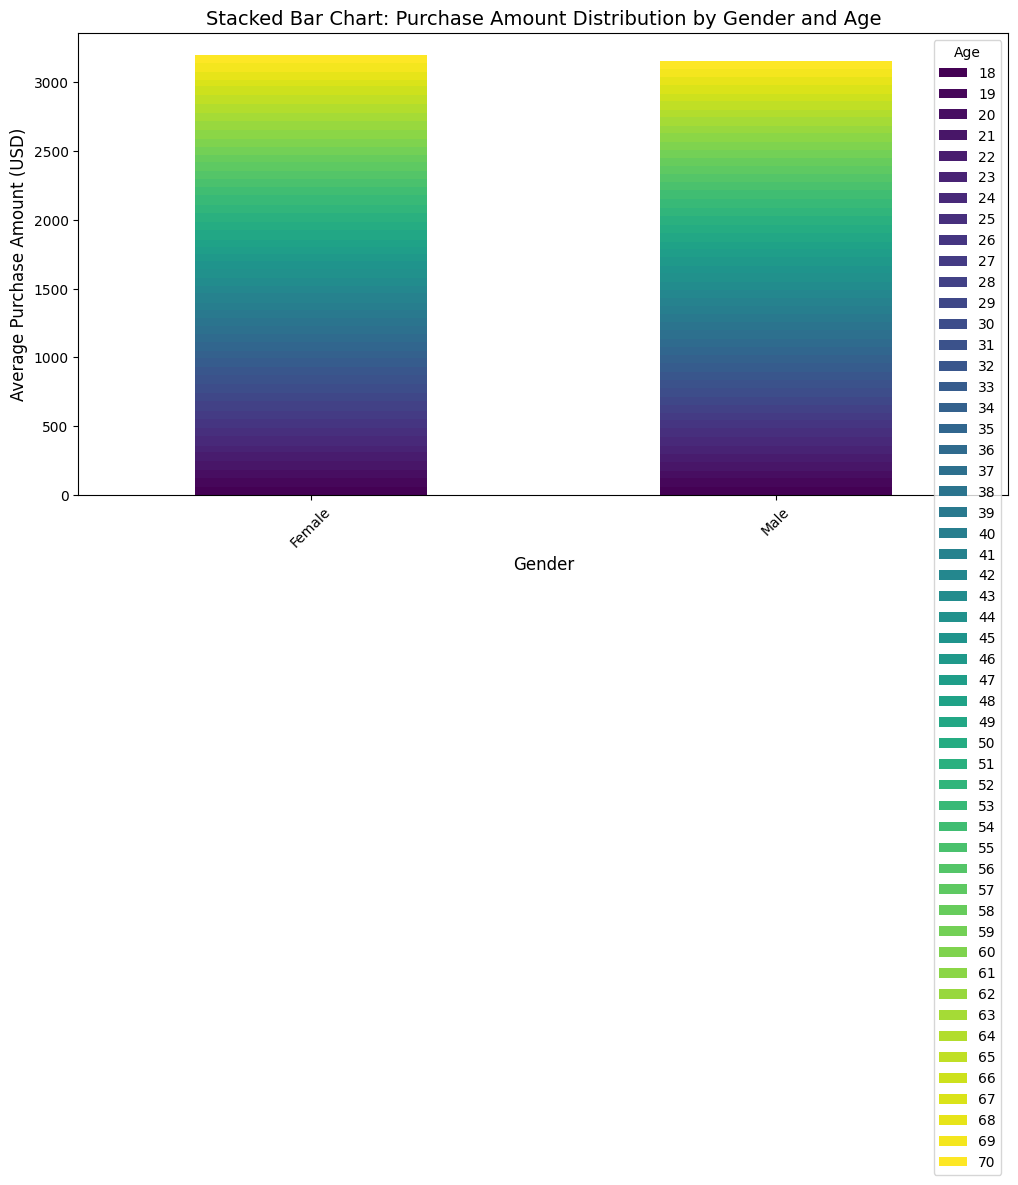

In [ ]:
!pip install pandas matplotlib seaborn plotly
from IPython import get_ipython
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files


# Read Excel file
df = pd.read_csv('/content/shopping_trends.csv')

print("Dataset Loaded:")
display(df.head())
print("\nDataset Info:")
print(df.info())

# Scatterplot Matrix
print("\nScatterplot Matrix:")
sns.pairplot(df[['Age', 'Purchase Amount (USD)', 'Review Rating']], diag_kind='kde', height=2.5)
plt.suptitle("Scatterplot Matrix for Continuous Variables", y=1.02, fontsize=14)
plt.show()

# Parallel Coordinates Plot
print("\nParallel Coordinates Plot:")
df['Gender_code'] = pd.factorize(df['Gender'])[0]

fig = px.parallel_coordinates(
    df,
    dimensions=['Age', 'Purchase Amount (USD)', 'Review Rating'],
    color='Gender_code',
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={
        "Age": "Age",
        "Purchase Amount (USD)": "Purchase Amount (USD)",
        "Review Rating": "Review Rating",
        "Gender_code": "Gender"
    },
    title="Parallel Coordinates Plot"
)
fig.show()

# Line Graph (using Age groups as time-like series for demo)
print("\nLine Graph:")
df_grouped = df.groupby(['Age', 'Gender'])['Purchase Amount (USD)'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Age', y='Purchase Amount (USD)', hue='Gender', palette='tab10')
plt.title('Line Graph: Purchase Amount Trend Across Ages by Gender', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Stacked Bar Chart
print("\nStacked Bar Chart:")
df_stacked = df.groupby(['Gender', 'Age'])['Purchase Amount (USD)'].mean().unstack()
df_stacked.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart: Purchase Amount Distribution by Gender and Age', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Age')
plt.tight_layout()
plt.show()


Andrews Curve Plot:


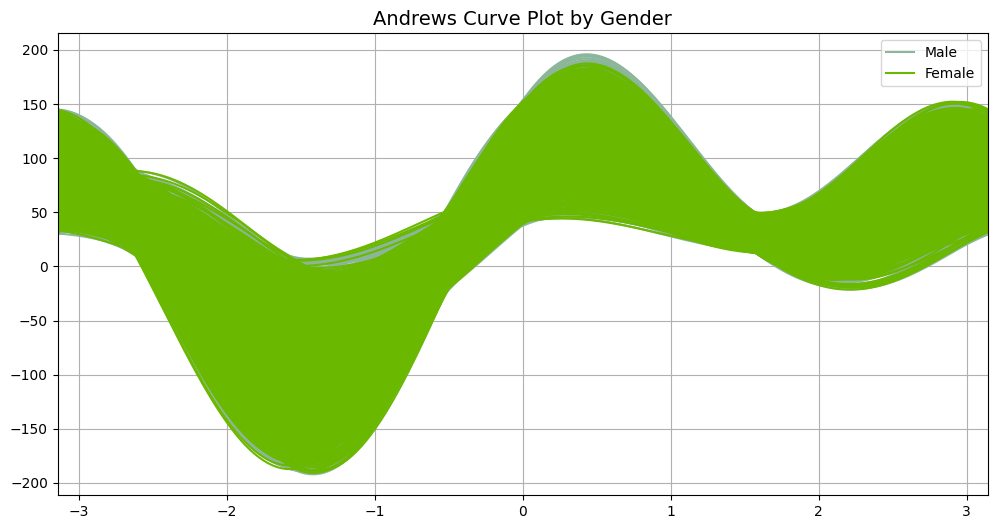

In [ ]:

from pandas.plotting import andrews_curves
print("\nAndrews Curve Plot:")
plt.figure(figsize=(12, 6))
andrews_curves(df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender']], 'Gender')
plt.title('Andrews Curve Plot by Gender', fontsize=14)
plt.show()


Radar Chart:


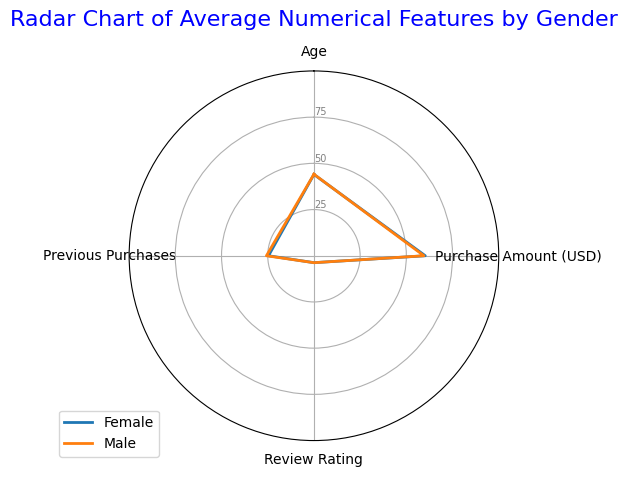

In [ ]:
# Radar Chart (Example with a few numerical features and grouping by Gender)
import numpy as np

print("\nRadar Chart:")

# Select numerical columns and the grouping variable
df_radar = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Gender']].copy()

# Calculate the mean of numerical features for each gender
df_radar_grouped = df_radar.groupby('Gender')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean().reset_index()

# Number of variables we're plotting.
categories = list(df_radar_grouped.columns[1:])
N = len(categories)

# What will be the angle of each axis in the plot? (divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to go in the top/central position, divide by number of variables.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75], ["25", "50", "75"], color="grey", size=7)
plt.ylim(0, 100) # Adjust ylim based on your data range

# Plot data
for i in range(len(df_radar_grouped)):
    values = df_radar_grouped.iloc[i, 1:].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=df_radar_grouped.iloc[i, 0])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Radar Chart of Average Numerical Features by Gender', size=16, color='blue', y=1.1)

plt.show()

In [ ]:
!pip install kagglehub plotly pandas
import kagglehub
import pandas as pd
import plotly.express as px
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
data = pd.read_csv(path + '/covtype.csv')
agg = data.groupby(['Cover_Type', 'Wilderness_Area1']).size().reset_index(name='count')
# Rectangular treemap
fig1 = px.treemap(agg, path=['Cover_Type', 'Wilderness_Area1'], values='count')
fig1.show()
# Sunburst treemap
fig2 = px.sunburst(agg, path=['Cover_Type', 'Wilderness_Area1'], values='count')
fig2.show()


100%|██████████| 11.2M/11.2M [00:00<00:00, 145MB/s]

Extracting files...


Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


SyntaxError: invalid syntax (ipython-input-1477615912.py, line 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Assuming your dataframe 'df' is already loaded and contains these columns:
# 'Category', 'Item Purchased', 'Payment Method', 'Shipping Type'

# -----------------------------
# 1. Network Graph: Category → Item Purchased
# -----------------------------

G_cat_item = nx.DiGraph()

# Add edges from Category to Item Purchased
for _, row in df.iterrows():
    G_cat_item.add_edge(row['Category'], row['Item Purchased'])

categories = set(df['Category'])
items = set(df['Item Purchased'])

# Layout for better spacing
pos = nx.spring_layout(G_cat_item, k=0.7, iterations=70, seed=42)

plt.figure(figsize=(18, 12))

# Draw Category nodes (larger and teal)
nx.draw_networkx_nodes(
    G_cat_item,
    pos,
    nodelist=categories,
    node_size=2500,
    node_color='lightseagreen',
    alpha=0.9,
    label='Category'
)

# Draw Item Purchased nodes (smaller and coral)
nx.draw_networkx_nodes(
    G_cat_item,
    pos,
    nodelist=items,
    node_size=800,
    node_color='lightcoral',
    alpha=0.8,
    label='Item Purchased'
)

# Draw edges with arrows
nx.draw_networkx_edges(
    G_cat_item,
    pos,
    arrowstyle='-|>',
    arrowsize=20,
    width=1.5,
    alpha=0.6,
    edge_color='gray'
)

# Label only Category nodes for clarity
nx.draw_networkx_labels(
    G_cat_item,
    pos,
    labels={node: node for node in categories},
    font_size=12,
    font_weight='bold',
    font_color='black'
)

plt.title('Enhanced Network Graph: Category → Item Purchased', fontsize=18, fontweight='bold', pad=20)
plt.axis('off')
plt.legend(scatterpoints=1, fontsize=12)
plt.tight_layout()
plt.show()


# -----------------------------
# 2. Network Graph: Payment Method → Shipping Type
# -----------------------------

G_pay_ship = nx.DiGraph()

# Add edges from Payment Method to Shipping Type
for _, row in df.iterrows():
    G_pay_ship.add_edge(row['Payment Method'], row['Shipping Type'])

payment_methods = set(df['Payment Method'])
shipping_types = set(df['Shipping Type'])

pos2 = nx.spring_layout(G_pay_ship, k=0.7, iterations=70, seed=42)

plt.figure(figsize=(18, 12))

# Draw Payment Method nodes (larger, skyblue)
nx.draw_networkx_nodes(
    G_pay_ship,
    pos2,
    nodelist=payment_methods,
    node_size=2500,
    node_color='skyblue',
    alpha=0.9,
    label='Payment Method'
)

# Draw Shipping Type nodes (smaller, orange)
nx.draw_networkx_nodes(
    G_pay_ship,
    pos2,
    nodelist=shipping_types,
    node_size=800,
    node_color='orange',
    alpha=0.8,
    label='Shipping Type'
)

# Draw edges with arrows
nx.draw_networkx_edges(
    G_pay_ship,
    pos2,
    arrowstyle='-|>',
    arrowsize=20,
    width=1.5,
    alpha=0.6,
    edge_color='gray'
)

# Label only Payment Method nodes
nx.draw_networkx_labels(
    G_pay_ship,
    pos2,
    labels={node: node for node in payment_methods},
    font_size=12,
    font_weight='bold',
    font_color='black'
)

plt.title('Enhanced Network Graph: Payment Method → Shipping Type', fontsize=18, fontweight='bold', pad=20)
plt.axis('off')
plt.legend(scatterpoints=1, fontsize=12)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

Using Colab cache for faster access to the 'customer-shopping-trends-dataset' dataset.


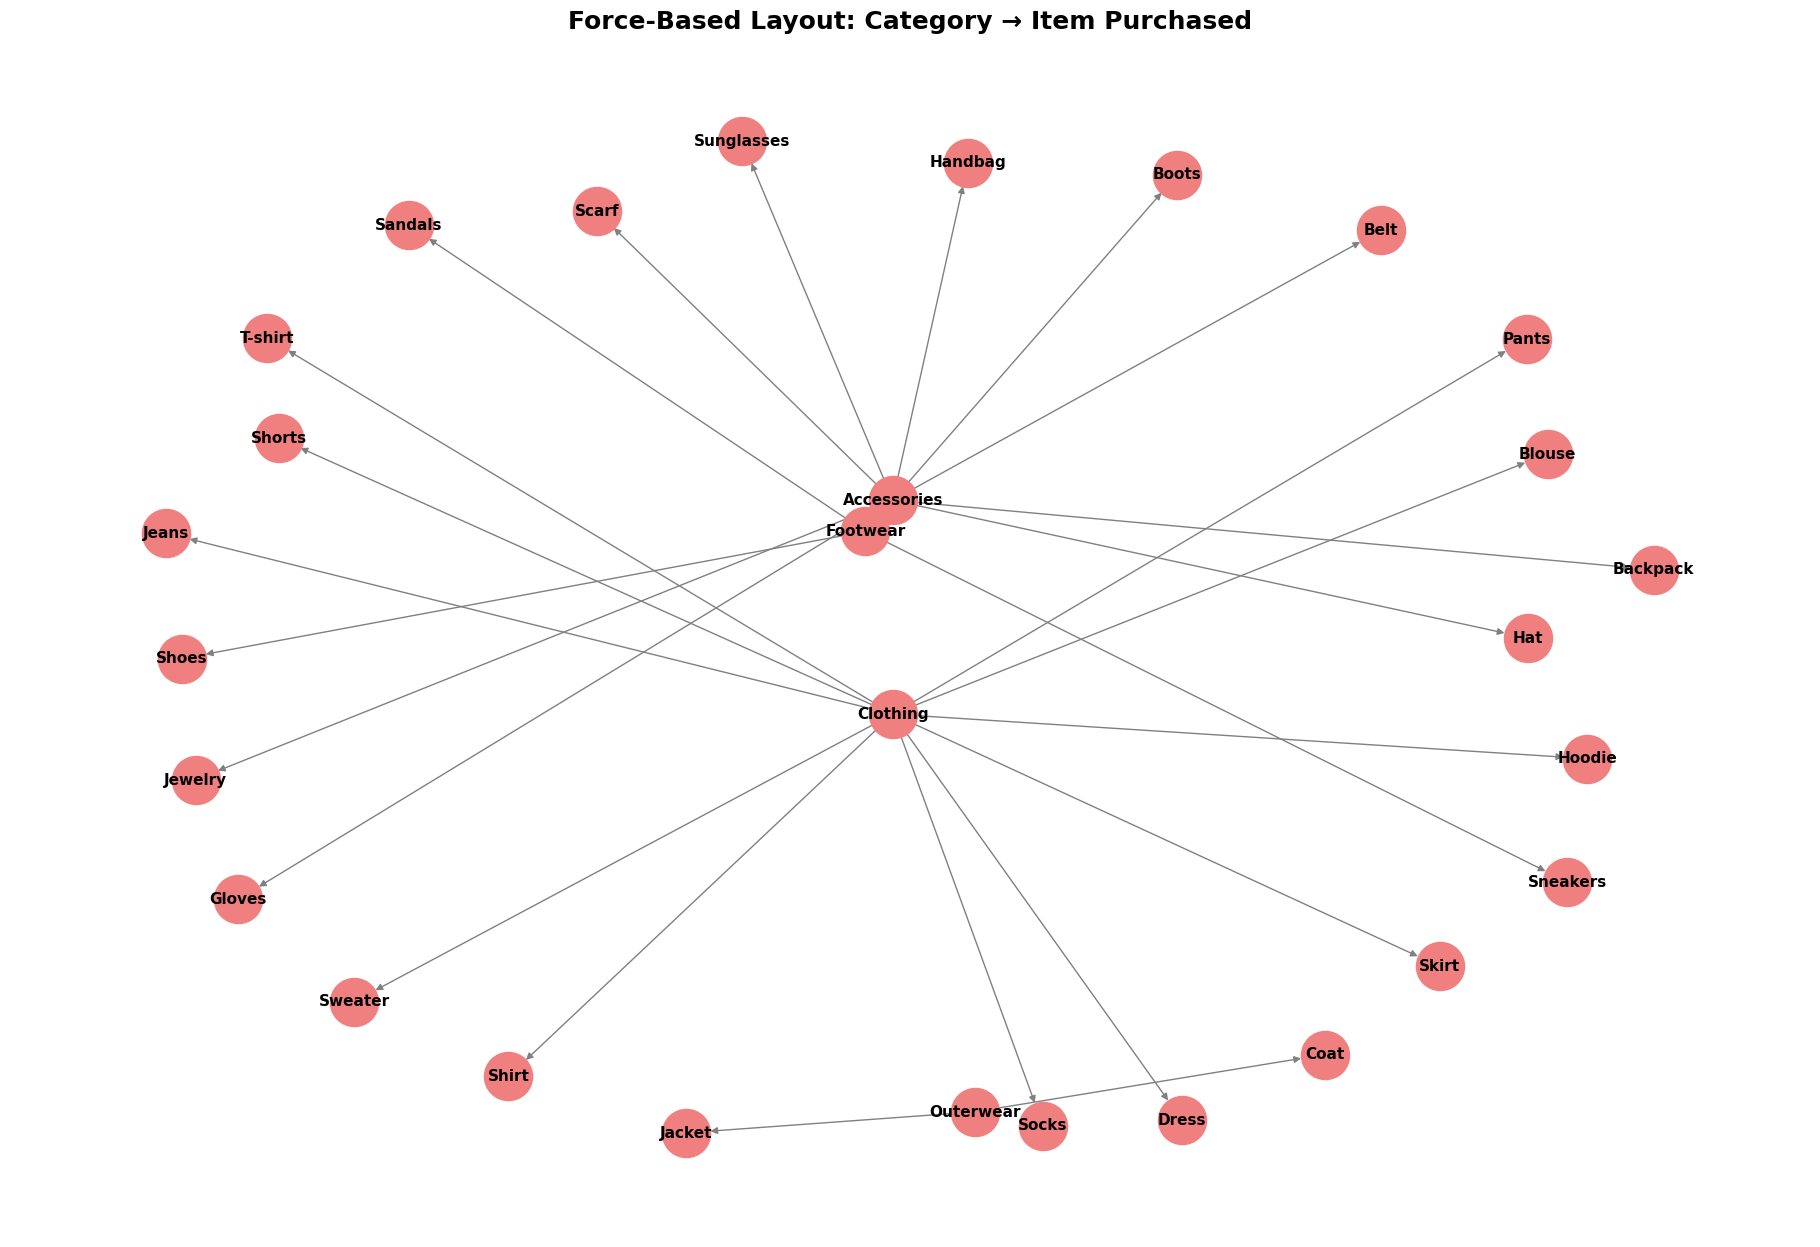

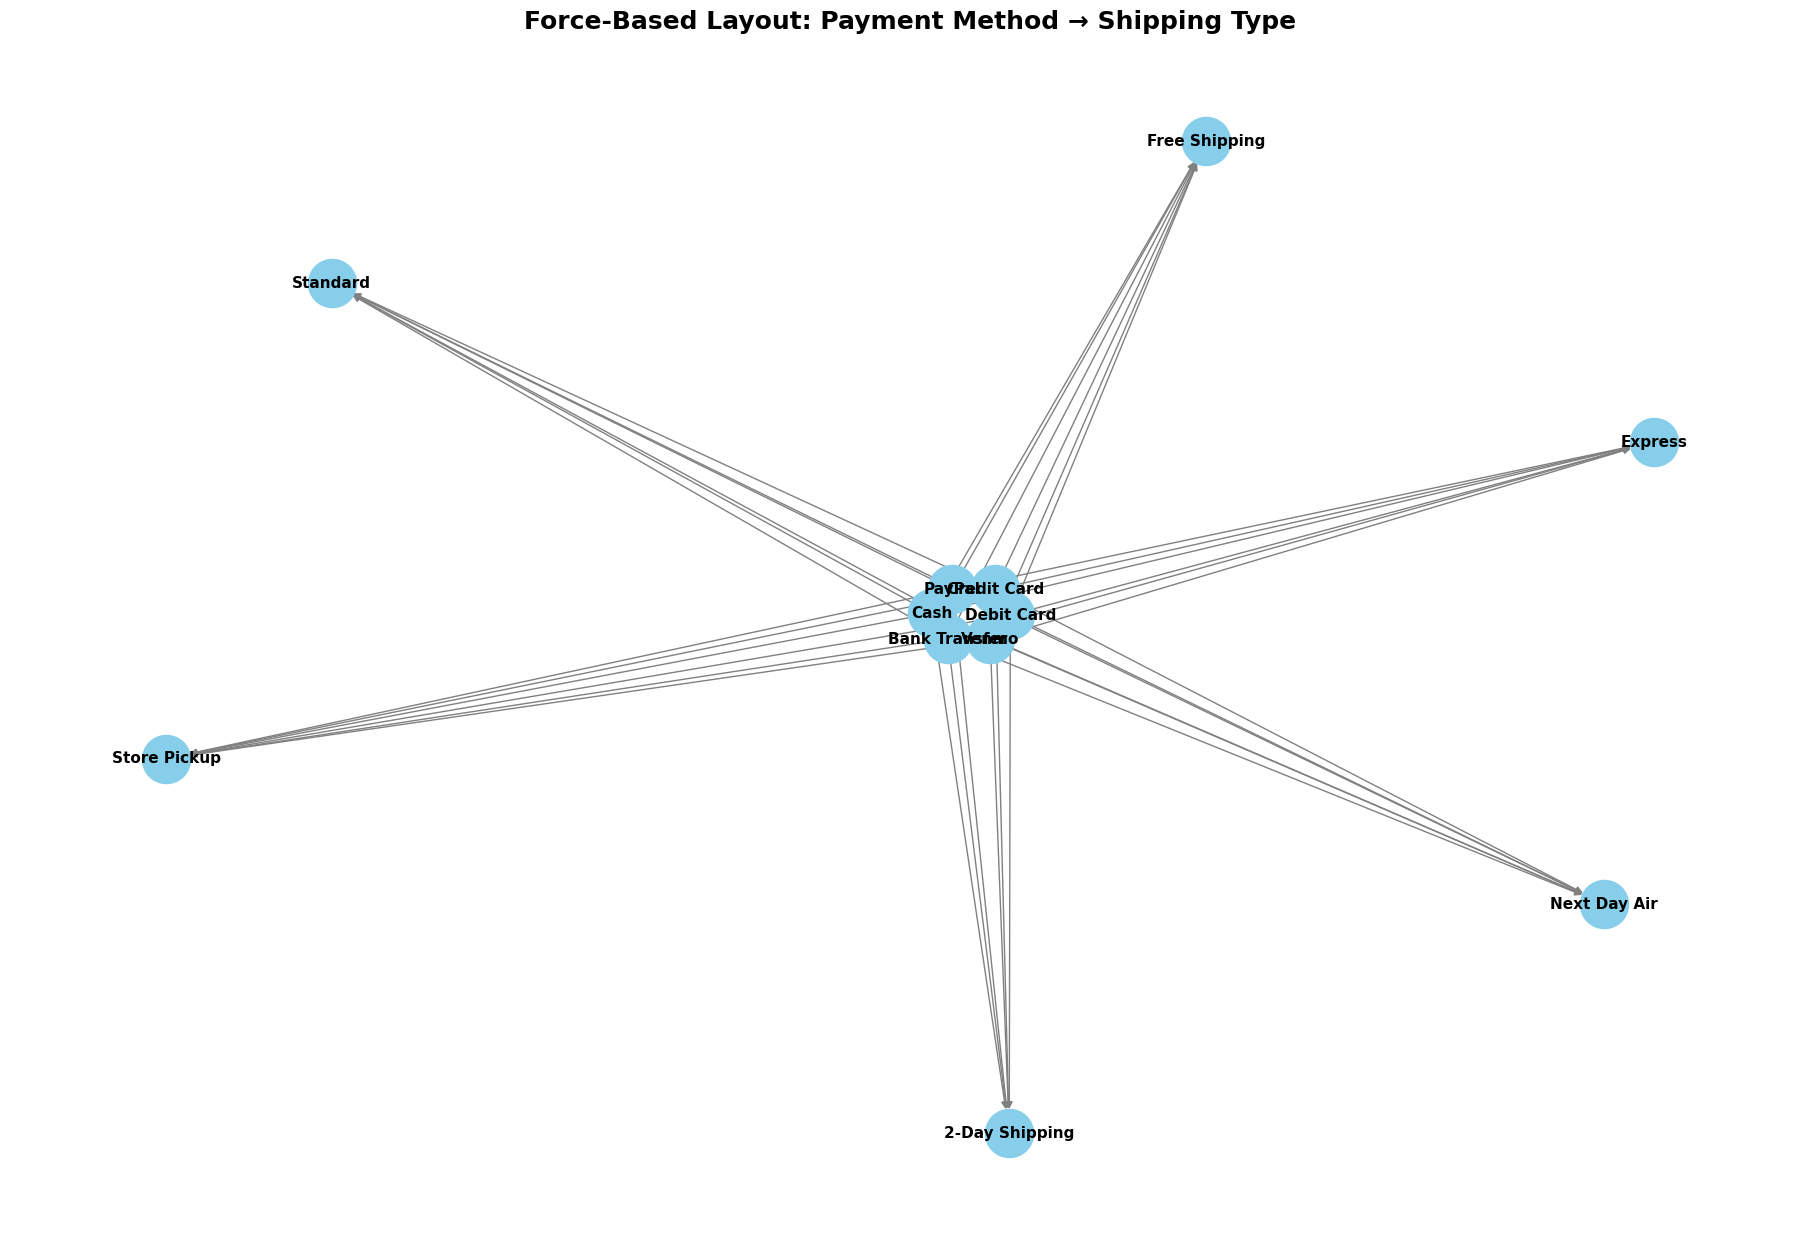

100%|██████████| 1.28k/1.28k [00:00<00:00, 2.87MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kamrankausar/iris-data/versions/2
Columns available: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


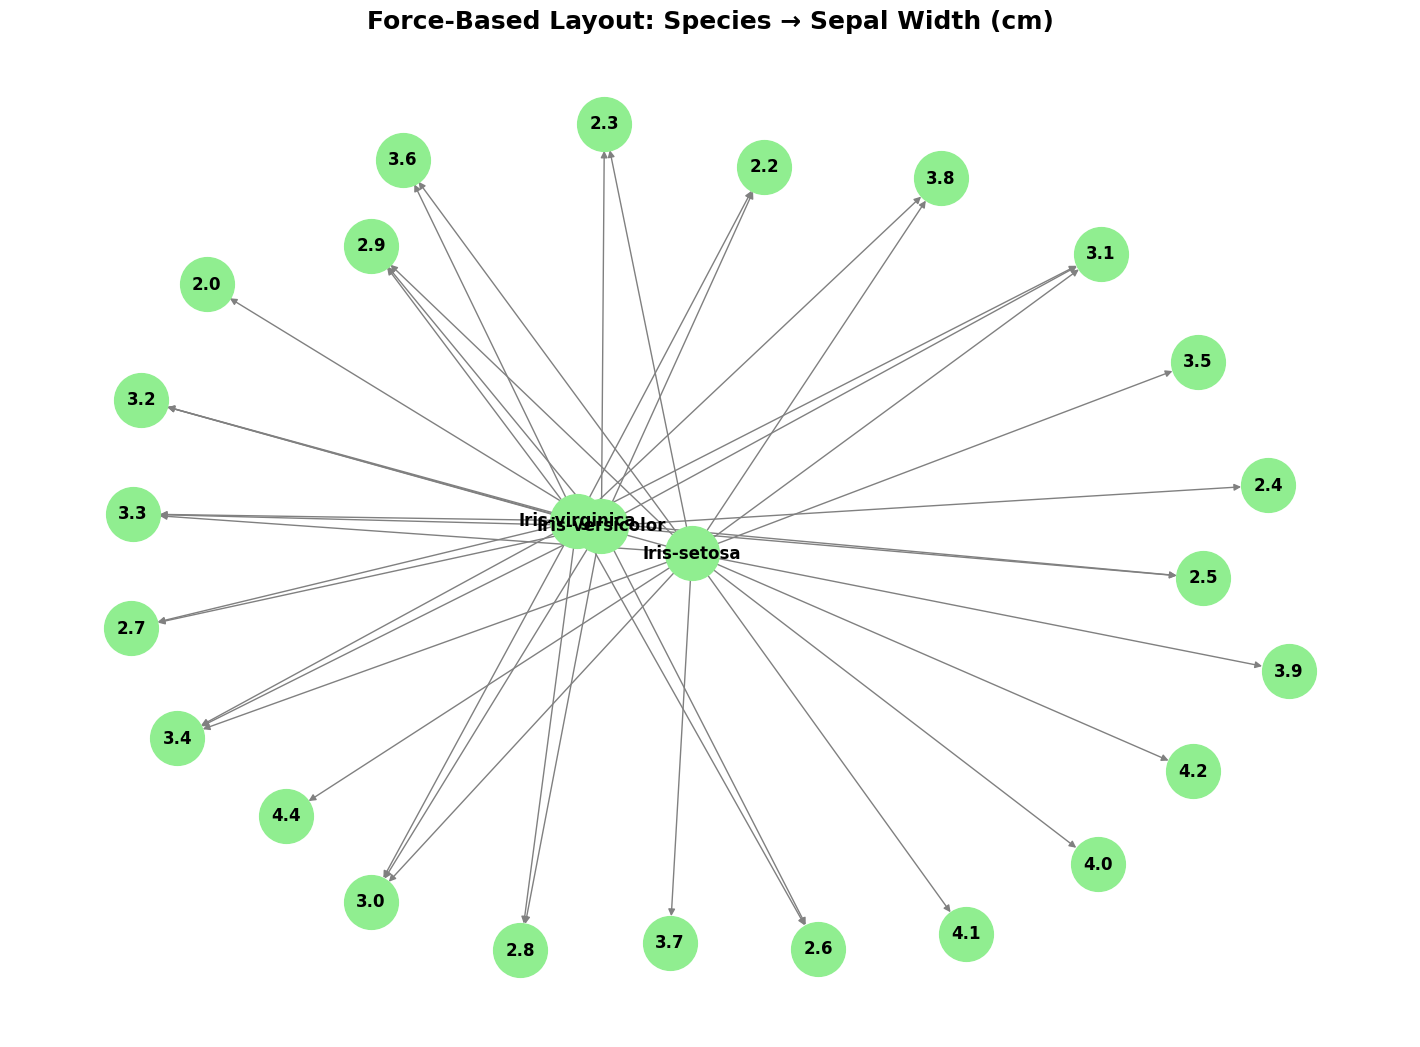

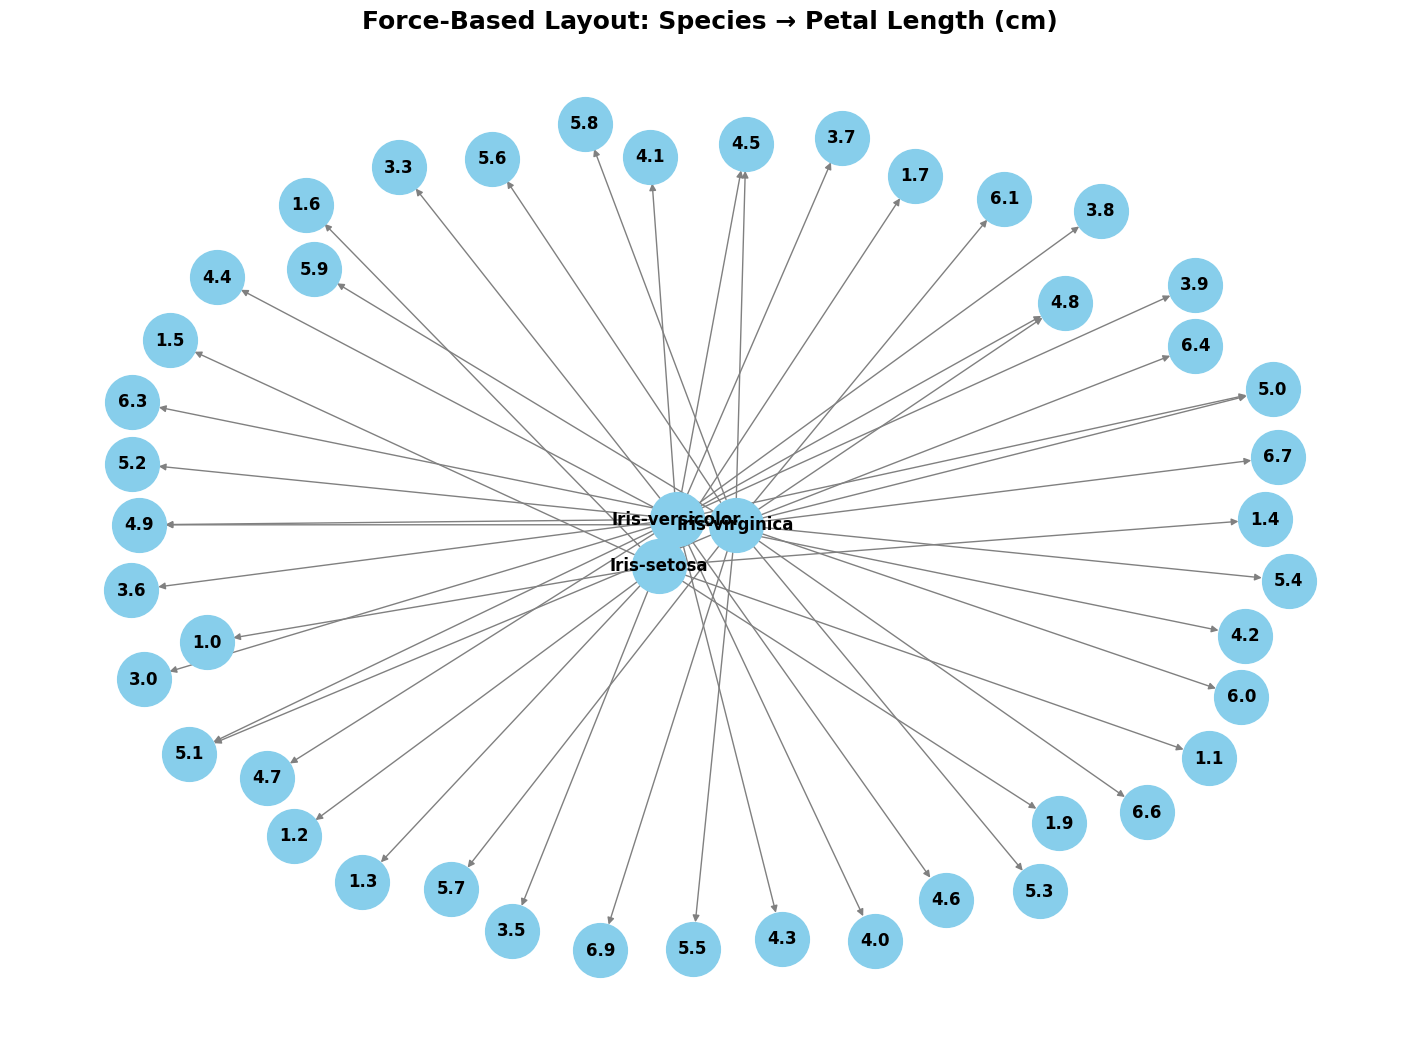

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


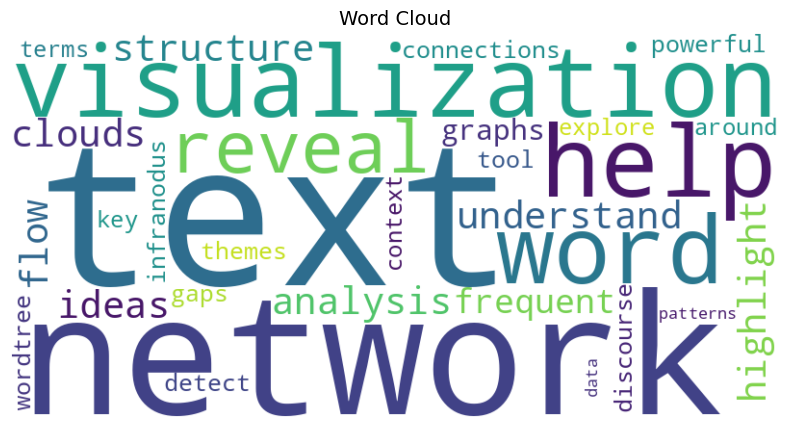

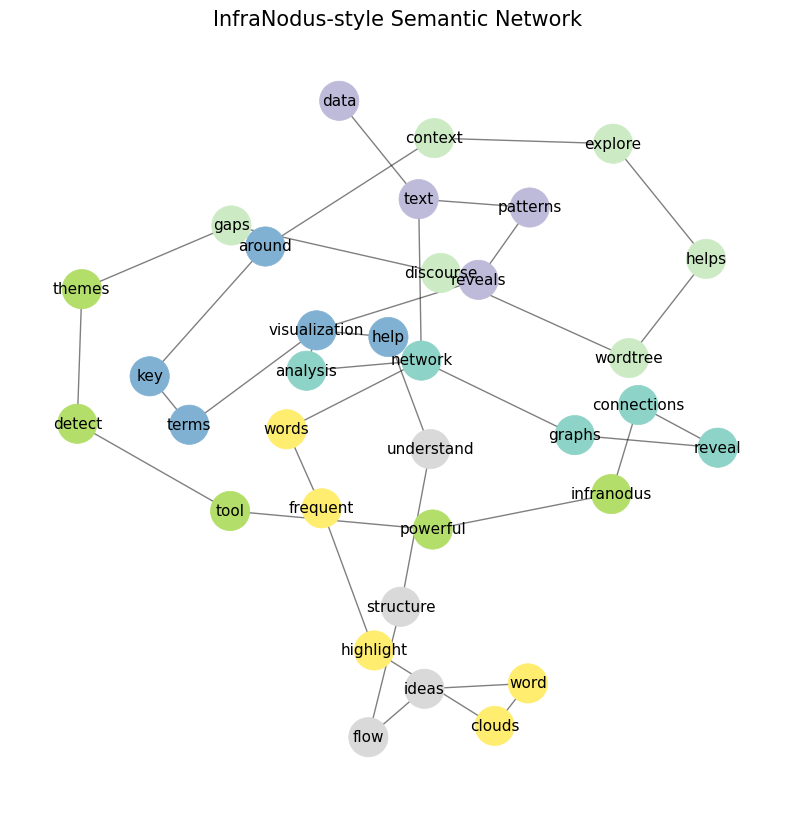

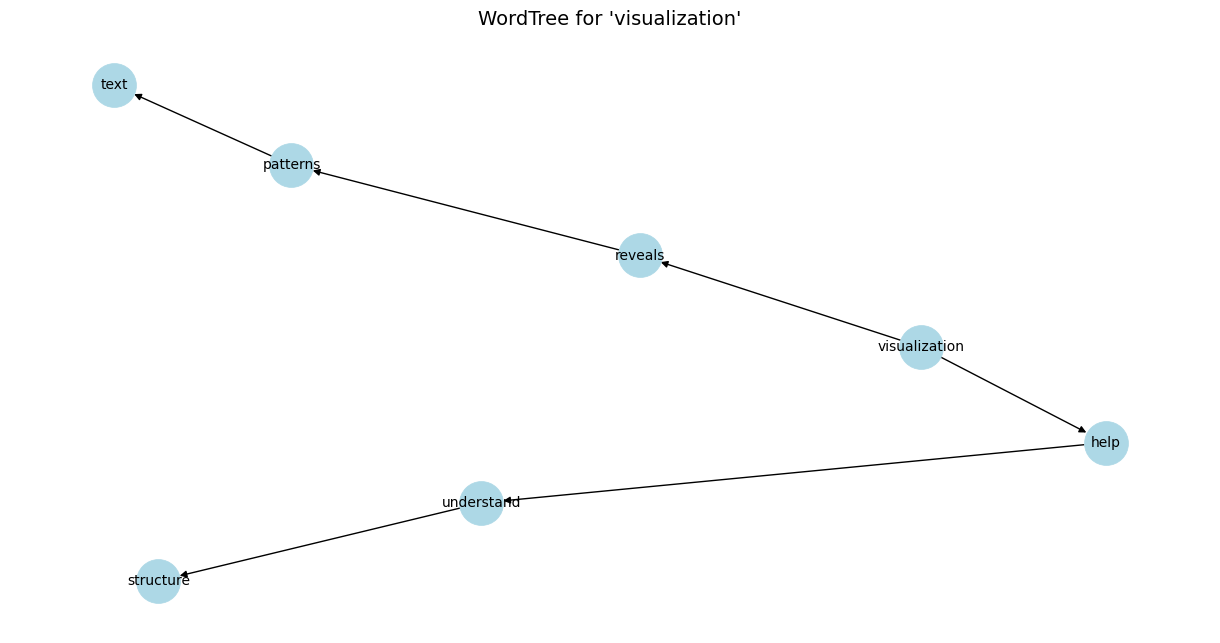


Concordance lines for 'network':

... text network analysis visualization help understand structure ...
... word clouds highlight frequent words network graphs reveal connections infranodus powerful ...


In [ ]:
# ===============================================
# TEXT NETWORK + WORDTREE + INFRANODUS STYLE ANALYSIS
# ===============================================

# Install necessary libraries
!pip install wordcloud networkx matplotlib nltk python-louvain

# Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Import best_partition directly
from community.community_louvain import best_partition
from itertools import islice

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
text = """
Text network analysis and visualization help understand the structure and flow of ideas.
Word clouds highlight frequent words, while network graphs reveal connections.
InfraNodus is a powerful tool to detect themes and gaps in discourse.
WordTree helps explore the context around key terms. Visualization reveals patterns in text data.
"""
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=14)
plt.show()
window_size = 2
co_occurrences = defaultdict(int)

for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i+window_size]
    for j in range(len(window)):
        for k in range(j+1, len(window)):
            pair = tuple(sorted([window[j], window[k]]))
            co_occurrences[pair] += 1

G = nx.Graph()
for (w1, w2), weight in co_occurrences.items():
    G.add_edge(w1, w2, weight=weight)


partition = best_partition(G)  # Use best_partition directly
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=800,
                       cmap=plt.cm.Set3, node_color=[partition[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[w for w in weights], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=11)
plt.title("InfraNodus-style Semantic Network", fontsize=15)
plt.axis('off')
plt.show()

from collections import defaultdict

def build_wordtree(tokens, root_word, depth=3):
    tree = defaultdict(list)
    for i, token in enumerate(tokens):
        if token == root_word:
            next_tokens = list(islice(tokens, i+1, i+1+depth))
            if next_tokens:
                tree[root_word].append(next_tokens)
    return tree

def plot_wordtree(tree, root_word):
    G_tree = nx.DiGraph()
    for phrase_list in tree[root_word]:
        parent = root_word
        for w in phrase_list:
            G_tree.add_edge(parent, w)
            parent = w

    plt.figure(figsize=(12,6))
    # Use spring_layout as an alternative to graphviz_layout
    pos = nx.spring_layout(G_tree)
    nx.draw(G_tree, pos, with_labels=True, node_color='lightblue',
            node_size=1000, font_size=10, arrows=True)
    plt.title(f"WordTree for '{root_word}'", fontsize=14)
    plt.show()

# Example WordTree
chosen_word = "visualization"
tree = build_wordtree(tokens, chosen_word, depth=3)
if tree:
    plot_wordtree(tree, chosen_word)
else:
    print(f"No occurrences of '{chosen_word}' found in text.")

# -----------------------------
# 5️⃣ SIMPLE CONCORDANCE (Text Context)
# -----------------------------
chosen_word = 'network'
window_context = 5

print(f"\nConcordance lines for '{chosen_word}':\n")
for i, token in enumerate(tokens):
    if token == chosen_word:
        start = max(0, i - window_context)
        end = min(len(tokens), i + window_context + 1)
        context = tokens[start:end]
        print('... ' + ' '.join(context) + ' ...')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


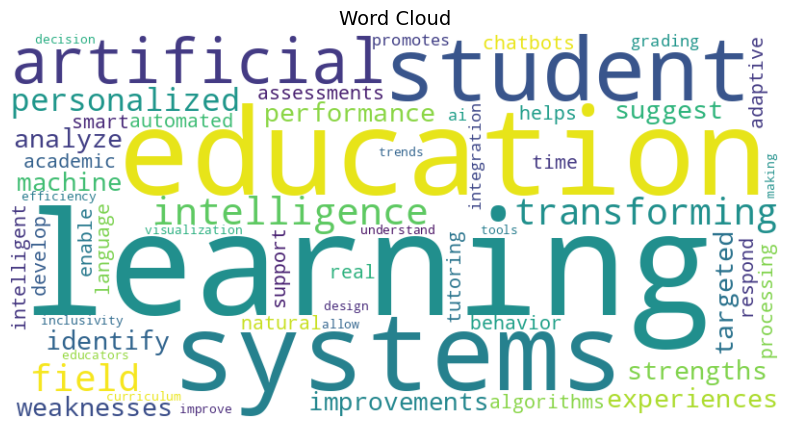

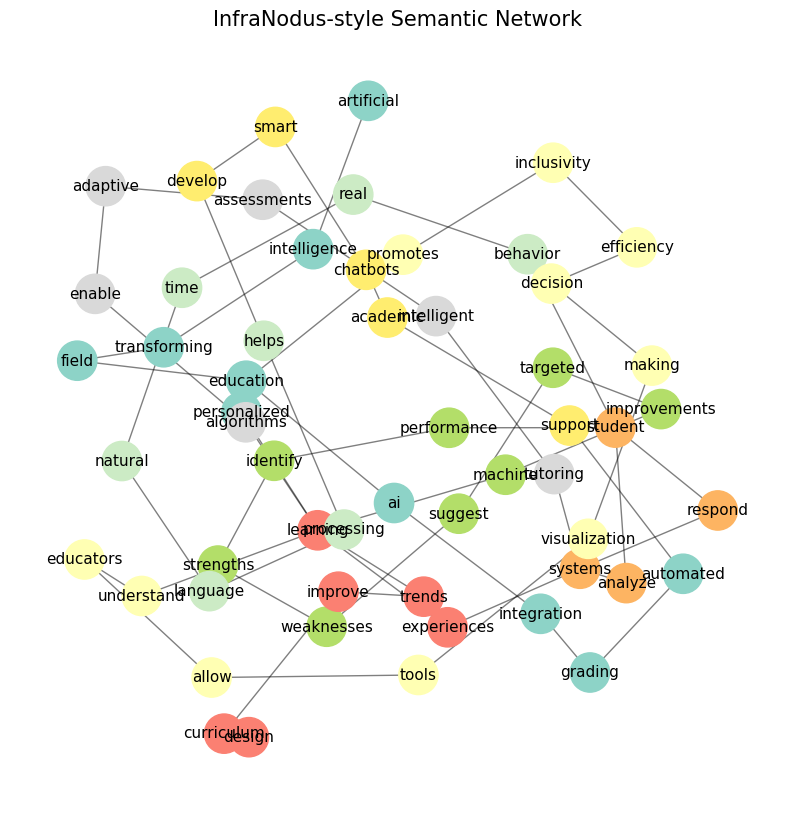

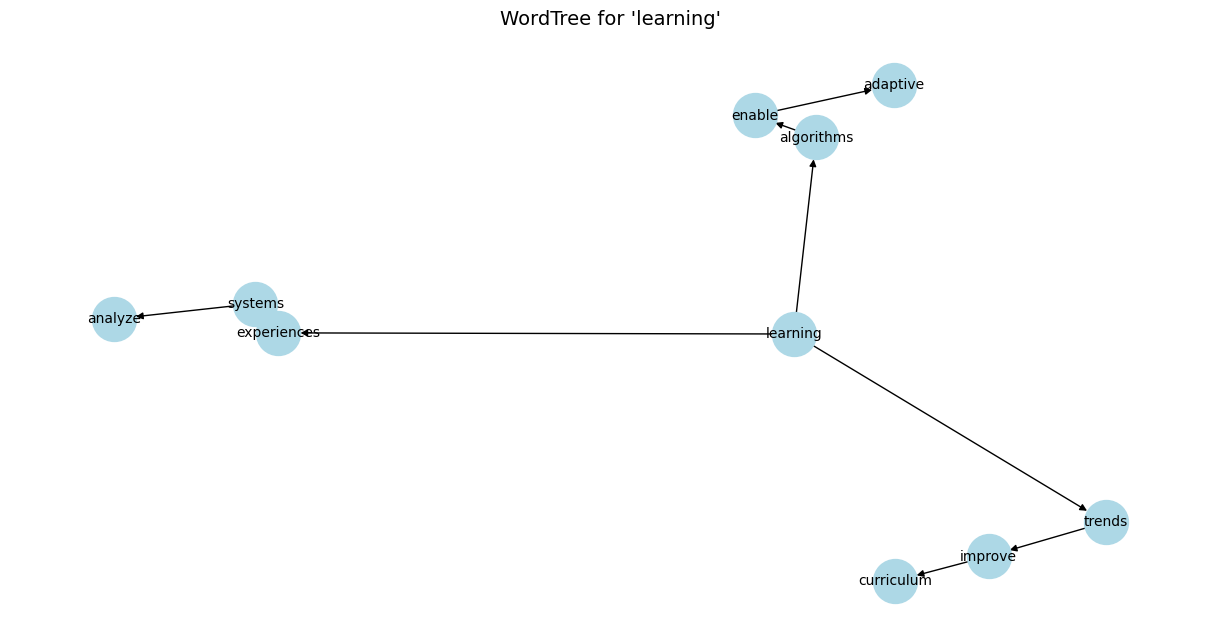


Concordance lines for 'education':

... artificial intelligence transforming field education personalized learning experiences systems analyze ...
... support automated grading integration ai education promotes inclusivity efficiency decision making ...


In [ ]:
# ===============================================
# TEXT NETWORK + WORDTREE + INFRANODUS STYLE ANALYSIS (AI in Education)
# ===============================================

# Install necessary libraries
!pip install wordcloud networkx matplotlib nltk python-louvain

# Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
from collections import defaultdict
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Import best_partition directly
from community.community_louvain import best_partition
from itertools import islice

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download missing resource

# -----------------------------
# 1️⃣ TEXT INPUT
# -----------------------------
text = """
Artificial intelligence is transforming the field of education through personalized learning experiences.
AI-powered systems can analyze student performance, identify strengths and weaknesses, and suggest targeted improvements.
Machine learning algorithms enable adaptive assessments and intelligent tutoring systems that respond to student behavior in real time.
Natural language processing helps develop smart chatbots for academic support and automated grading.
The integration of AI in education promotes inclusivity, efficiency, and data-driven decision making.
Visualization tools allow educators to understand learning trends and improve curriculum design.
"""

# -----------------------------
# 2️⃣ TEXT PREPROCESSING
# -----------------------------
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(text.lower())
tokens = [t for t in tokens if t.isalpha() and t not in stop_words]

# -----------------------------
# 3️⃣ WORD CLOUD
# -----------------------------
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize=14)
plt.show()

# -----------------------------
# 4️⃣ CO-OCCURRENCE NETWORK (InfraNodus-style)
# -----------------------------
window_size = 2
co_occurrences = defaultdict(int)

for i in range(len(tokens) - window_size + 1):
    window = tokens[i:i+window_size]
    for j in range(len(window)):
        for k in range(j+1, len(window)):
            pair = tuple(sorted([window[j], window[k]]))
            co_occurrences[pair] += 1

G = nx.Graph()
for (w1, w2), weight in co_occurrences.items():
    G.add_edge(w1, w2, weight=weight)

partition = best_partition(G)
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_size=800,
                       cmap=plt.cm.Set3, node_color=[partition[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[w for w in weights], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=11)
plt.title("InfraNodus-style Semantic Network", fontsize=15)
plt.axis('off')
plt.show()

# -----------------------------
# 5️⃣ WORDTREE VISUALIZATION
# -----------------------------
def build_wordtree(tokens, root_word, depth=3):
    tree = defaultdict(list)
    for i, token in enumerate(tokens):
        if token == root_word:
            next_tokens = list(islice(tokens, i+1, i+1+depth))
            if next_tokens:
                tree[root_word].append(next_tokens)
    return tree

def plot_wordtree(tree, root_word):
    G_tree = nx.DiGraph()
    for phrase_list in tree[root_word]:
        parent = root_word
        for w in phrase_list:
            G_tree.add_edge(parent, w)
            parent = w

    plt.figure(figsize=(12,6))
    pos = nx.spring_layout(G_tree)
    nx.draw(G_tree, pos, with_labels=True, node_color='lightblue',
            node_size=1000, font_size=10, arrows=True)
    plt.title(f"WordTree for '{root_word}'", fontsize=14)
    plt.show()

# Example WordTree
chosen_word = "learning"
tree = build_wordtree(tokens, chosen_word, depth=3)
if tree:
    plot_wordtree(tree, chosen_word)
else:
    print(f"No occurrences of '{chosen_word}' found in text.")

# -----------------------------
# 6️⃣ SIMPLE CONCORDANCE (Text Context)
# -----------------------------
chosen_word = 'education'
window_context = 5

print(f"\nConcordance lines for '{chosen_word}':\n")
for i, token in enumerate(tokens):
    if token == chosen_word:
        start = max(0, i - window_context)
        end = min(len(tokens), i + window_context + 1)
        context = tokens[start:end]
        print('... ' + ' '.join(context) + ' ...')